## Testing How To Get Colour Under Worm

In [14]:
# imports
from camo_worms_utils import *

Image name (shape) (intensity max, min, mean, std)

original (240, 720) (210, 0, 49.3, 34.8)


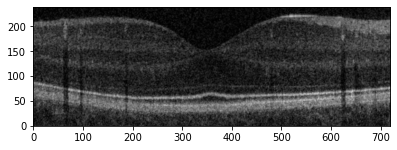

In [15]:
img = prep_image(IMAGE_DIR, IMAGE_NAME, MASK)

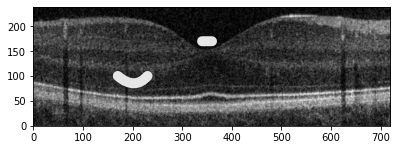

In [16]:
worm1 = Camo_Worm(200, 100, 30, 0, 30, 30, 10, 0.9)
worm2 = Camo_Worm(350, 170, 10, 0, 0, 0, 10, 0.9)
drawing = Drawing(img)
drawing.add_worms([worm1, worm2])
drawing.show()

In [17]:
# how does t work
# t is a value on [0,1] representing how far along the curve your point is
# try it out on worm1
print(worm2.bezier.point_at_t(0))
print(worm2.bezier.point_at_t(0.5))
print(worm2.bezier.point_at_t(1))

(340.0, 170.0)
(350.0, 170.0)
(360.0, 170.0)


In [18]:
# try on worm2
print(worm1.bezier.point_at_t(0))
print(worm1.bezier.point_at_t(0.5))
print(worm1.bezier.point_at_t(1))

(170.0, 100.0)
(202.31377174831374, 85.17952563860707)
(230.0, 100.0)


T values: [0.   0.25 0.5  0.75 1.  ]
Avg Colour: 0.0815686274509804


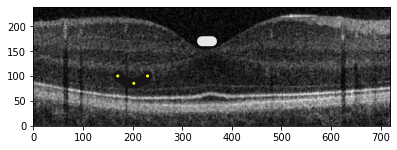

In [19]:
# t is a value on [0,1] representing how far along the curve your point is
# if we want to average over five points of the curve then do this
t_vals = np.linspace(0,1,5)
avg_colour = np.mean([worm1.colour_at_t(t, img) for t in t_vals])

print(f"T values: {t_vals}\nAvg Colour: {avg_colour}")

# draw reference worm over old one with avg colour
ref_worm = Camo_Worm(200, 100, 30, 0, 30, 30, 10, avg_colour)
drawing = Drawing(img)
drawing.add_worms([worm2, ref_worm])
drawing.add_dots(ref_worm.intermediate_points(3), 2, color="yellow")
drawing.show()

T values: [0.   0.25 0.5  0.75 1.  ]
Avg Colour: 0.046274509803921574


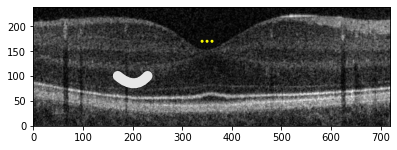

In [20]:
# repeat for worm 2
t_vals = np.linspace(0,1,5)
avg_colour = np.mean([worm2.colour_at_t(t, img) for t in t_vals])

print(f"T values: {t_vals}\nAvg Colour: {avg_colour}")

# draw reference worm over old one with avg colour
ref_worm = Camo_Worm(350, 170, 10, 0, 0, 0, 10, avg_colour)
drawing = Drawing(img)
drawing.add_worms([worm1, ref_worm])
drawing.add_dots(ref_worm.intermediate_points(3), 2, color="yellow")
drawing.show()

## Fitness (dist from mean colour)

Colour worm1: 0.38536068063138507
Colour mean: 0.0815686274509804
Colour Distance: 0.3037920531804047
test worm


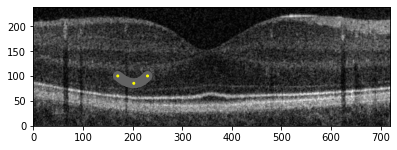

mean colour worm


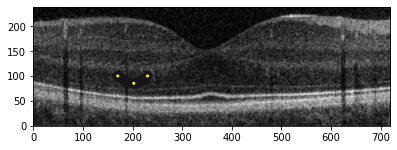

In [21]:
worm1 = Camo_Worm(200, 100, 30, 0, 30, 30, 10, rng.uniform(0,1))
t_vals = np.linspace(0,1,5)
avg_colour = np.mean([worm1.colour_at_t(t, img) for t in t_vals])
ref_worm = Camo_Worm(200, 100, 30, 0, 30, 30, 10, avg_colour)

colour_dist = np.abs(avg_colour - worm1.colour)
print(f"Colour worm1: {worm1.colour}")
print(f"Colour mean: {avg_colour}")
print(f"Colour Distance: {colour_dist}")

print("test worm")
drawing = Drawing(img)
drawing.add_worms([worm1])
drawing.add_dots(ref_worm.intermediate_points(3), 2, color="yellow")
drawing.show()
print("mean colour worm")
drawing = Drawing(img)
drawing.add_worms([ref_worm])
drawing.add_dots(ref_worm.intermediate_points(3), 2, color="yellow")
drawing.show()